In [89]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.core.lattice import Lattice
from pymatgen.core.structure import IStructure
from pymatgen.util.typing import Vector3Like
from pymatgen import Molecule 
from pymatgen import Structure

from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
#from pymatgen.symmetry.groups.PointGroup import 
from pymatgen.core.operations import SymmOp
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator
from pymatgen.core.spectrum import Spectrum
from pymatgen.electronic_structure.bandstructure import BandStructure,BandStructureSymmLine 


import numpy.matlib as np
import math
import pymatgen as mp
import pymatgen.symmetry.analyzer as span
import pymatgen.symmetry.groups as symm
import pymatgen.analysis.diffraction.xrd as diff


with MPRester("r7QKrVN0WzAjMGwDF") as m:
    structure = m.get_structure_by_material_id("mp-15793")
    bandstructure = m.get_bandstructure_by_material_id("mp-15793")
print(structure)
# Gap
gap = bandstructure.get_band_gap()
print(gap)
print("Bande interdite: indirecte d'énergie: ", gap["energy"], "eV" )
print(" ")

# Calcul min/max de dispersion
print(bandstructure.bands)
#print(bandstructure.nb_bands)


# Calcul masse effective
cell = Lattice.rhombohedral(6.923143,34.340415)
a = cell.a*(10**-10)
pi = math.pi
h = 1.05457*(10**-34)
m = 1.602*(10**-19)
me = 9.109*(10**-31)

# --- CONDUCTION ---
CBM = bandstructure.get_cbm()
print(CBM)
energyCBM = CBM["energy"] # en eV
energyC = energyCBM*m     # en  J
kCBM = CBM["kpoint"].frac_coords
kC = (kCBM[0]**2)*(((2*pi)/a)**2) + (kCBM[1]**2)*(((2*pi)/a)**2) + (kCBM[2]**2)*(((2*pi)/a)**2) # k carré
mC = ((h**2)*(kC))/(2*energyC)
print("la masse effective à la base de la première bande de conduction est: ", mC, "kg") 
print("Soit: ", mC/me, "fois la masse de l'électron")
print(" ")

# --- VALENCE --- 
VBM = bandstructure.get_vbm()
print(VBM)
energyVBM = VBM["energy"] # en eV
energyV = energyVBM*m     # en J
kVBM = VBM["kpoint"].frac_coords
kV = (kVBM[0]**2)*(((2*pi)/a)**2) + (kVBM[1]**2)*(((2*pi)/a)**2) + (kVBM[2]**2)*(((2*pi)/a)**2) # k carré
mV = ((h**2)*(kV))/(2*energyV)
print("la masse effective au sommet de la dernière bande de valence est: ", mV, "kg") 
print("Soit: ", mV/me, "fois la masse de l'électron")

# Calcul min/max de dispersion
print(bandstructure.bands)
print(" ")
#print(bandstructure.nb_bands)
#branch = VBM["kpoint_index"]
#print(branch)
#print(BandStructureSymmLine.get_branch(branch))
print("Les min/max de dispersion de la bande de conduction sont représenté en rouge sur la figure suivante.")
print("Le min se trouve dans la direction Z-Gamma")
print("Le max se trouve dans la direction Q-F")
print("Les min/max de dispersion de la bande de conduction sont représenté en vert sur la figure suivante. ")
print(" ")
print("Le min se trouve dans la direction Q-F")
print("Le max se trouve dans la direction Z-Gamma")

Full Formula (Li1 Tb1 Se2)
Reduced Formula: LiTbSe2
abc   :   6.923143   6.923143   6.923143
angles:  34.340415  34.340415  34.340415
Sites (4)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Li    0.5       0.5       0.5              0
  1  Se    0.248733  0.248733  0.248733         0
  2  Se    0.751267  0.751267  0.751267         0
  3  Tb    0         0         0                0
{'direct': False, 'energy': 1.5002999999999997, 'transition': '(0.031,0.000,-0.031)-F'}
Bande interdite: indirecte d'énergie:  1.5002999999999997 eV
 
{<Spin.up: 1>: array([[-43.4612, -43.4612, -43.4612, ..., -43.4609, -43.4609, -43.4609],
       [-19.8778, -19.8775, -19.8764, ..., -19.9314, -19.9309, -19.9304],
       [-19.7282, -19.7296, -19.7339, ..., -19.822 , -19.8221, -19.8223],
       ...,
       [ 13.3789,  13.2795,  13.1106, ...,  13.2628,  13.3891,  13.4838],
       [ 13.4044,  13.3064,  13.1234, ...,  14.7778,  14.6154,  14.4303],
       [

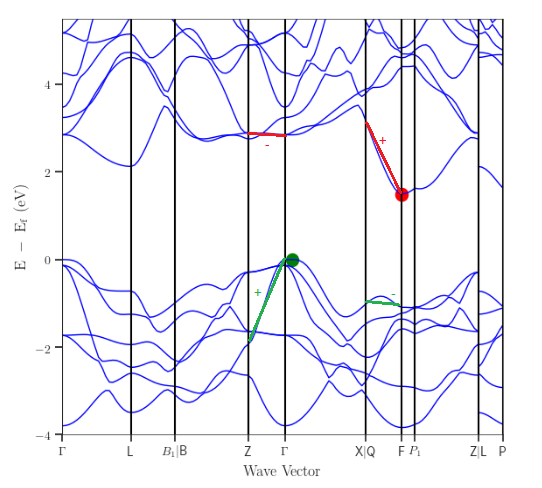